In [612]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import numpy as np
import statistics as stats
import sklearn
import re

%matplotlib inline

# Lab | Customer Analysis Round 2

## Dealing with the data

1. Show the dataframe shape.
2. Standardize header names.
3. Which columns are numerical?
4. Which columns are categorical?
5. Check and deal with NaN values.
6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

7. BONUS: Put all the previously mentioned data transformations into a function.

In [613]:
# import files


In [614]:
cust_data = pd.read_csv('marketing_customer_analysis.csv')
cust_data.shape

(10910, 26)

In [615]:
cust_data.columns


Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [616]:
def clean(X):
    X = X.drop(['Unnamed: 0'], axis=1) # remove 'Unnamed: 0' column
    
    X.columns = X.columns.str.replace(r"(?<=[a-z])(?=[A-Z])", " ") # add space before Capital letter
    
    X.columns = list(map(lambda el: el.upper(), X.columns)) #Capitalize column headers
    return X
     



In [617]:
cust_data = clean(cust_data)
cust_data

/var/folders/f0/2kttb75n7ksfn0xybq11r6h40000gn/T/ipykernel_2071/267075341.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  X.columns = X.columns.str.replace(r"(?<=[a-z])(?=[A-Z])", " ") # add space before Capital letter


CUSTOMER       STATE  CUSTOMER LIFETIME VALUE RESPONSE  COVERAGE  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928      NaN     Basic   

      EDUCATION EFFECTIVE TO DATE EMPLOYMENT STATUS GENDER  INCOME  \
0       College           2/18/11          Employed      M   48029   
1       College           1/18/11        Unemployed      F       0   
2      Bachelor           2/10/11          Employed      M   22139   
3       College           1/11/11          Employed      M   49078   
4      Bachelor           1/17/11     Medical Leave      F   23675   
...         ...               ...               ...    ...     ...   
10905  Bachelor           1/19/11        Unemployed      F       0   
10906   College            1/6/11          Employed      F   61146   
10907  Bachelor            2/6/11          Employed      F   39837   
10908   College           2/13/11          Employed      F   64195   
10909  Bachelor            1/8/11        Unemployed      M       0   

      LOCATION CODE MARITAL STATUS  MONTHLY PREMIUM AUTO  \
0          Suburban        Married                    61   
1          Suburban         Single                    64   
2          Suburban         Single                   100   
3          Suburban         Single                    97   
4          Suburban        Married                   117   
...             ...            ...                   ...   
10905      Suburban        Married                   253   
10906         Urban        Married                    65   
10907         Rural        Married                   201   
10908         Urban       Divorced                   158   
10909      Suburban         Single                   101   

       MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
4                          NaN                             31   
...                        ...                            ...   
10905                      NaN                             40   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   
10909                     31.0                              1   

       NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES     POLICY TYPE  \
0                            0.0                   9  Corporate Auto   
1                            0.0                   1   Personal Auto   
2                            0.0                   2   Personal Auto   
3                            0.0                   2  Corporate Auto   
4                            NaN                   7   Personal Auto   
...                          ...                 ...             ...   
10905                        NaN                   7   Personal Auto   
10906                        0.0                   6   Personal Auto   
10907                        0.0                   2  Corporate Auto   
10908                        4.0                   6  

In [618]:
print('Numeric columns: ')
list(cust_data.select_dtypes(include = np.number)) # Numeric columns


Numeric columns: 


['CUSTOMER LIFETIME VALUE',
 'INCOME',
 'MONTHLY PREMIUM AUTO',
 'MONTHS SINCE LAST CLAIM',
 'MONTHS SINCE POLICY INCEPTION',
 'NUMBER OF OPEN COMPLAINTS',
 'NUMBER OF POLICIES',
 'TOTAL CLAIM AMOUNT']

In [619]:
print('Categorical columns: ')
list(cust_data.select_dtypes('object')) # Categorical columns

Categorical columns: 


['CUSTOMER',
 'STATE',
 'RESPONSE',
 'COVERAGE',
 'EDUCATION',
 'EFFECTIVE TO DATE',
 'EMPLOYMENT STATUS',
 'GENDER',
 'LOCATION CODE',
 'MARITAL STATUS',
 'POLICY TYPE',
 'POLICY',
 'RENEW OFFER TYPE',
 'SALES CHANNEL',
 'VEHICLE CLASS',
 'VEHICLE SIZE',
 'VEHICLE TYPE']

In [620]:
# Check NaN values

# 1. Drop the column with less than 5% of rows filled with data

In [621]:
print(cust_data['STATE'].unique())
print(cust_data['RESPONSE'].unique())
print(cust_data['MONTHS SINCE LAST CLAIM'].unique())
print(cust_data['NUMBER OF OPEN COMPLAINTS'].unique())
print(cust_data['VEHICLE CLASS'].unique())
print(cust_data['VEHICLE SIZE'].unique())
print(cust_data['VEHICLE TYPE'].unique())


['Arizona' 'California' 'Washington' 'Oregon' nan 'Nevada']
['No' 'Yes' nan]
[ 7.  3. 34. 10. nan  2.  8. 35. 33. 19. 13.  5. 24. 25.  6. 20. 26. 14.
  9. 29. 11.  1. 18. 16. 30. 12.  4. 22. 31. 21. 28. 17. 15. 32. 23. 27.
  0.]
[ 0. nan  3.  1.  2.  4.  5.]
['Four-Door Car' 'SUV' 'Two-Door Car' 'Sports Car' 'Luxury Car'
 'Luxury SUV' nan]
['Medsize' 'Small' 'Large' nan]
[nan 'A']


In [622]:
round(cust_data.isna().sum()/len(cust_data),4)*100 

CUSTOMER                          0.00
STATE                             5.78
CUSTOMER LIFETIME VALUE           0.00
RESPONSE                          5.78
COVERAGE                          0.00
EDUCATION                         0.00
EFFECTIVE TO DATE                 0.00
EMPLOYMENT STATUS                 0.00
GENDER                            0.00
INCOME                            0.00
LOCATION CODE                     0.00
MARITAL STATUS                    0.00
MONTHLY PREMIUM AUTO              0.00
MONTHS SINCE LAST CLAIM           5.80
MONTHS SINCE POLICY INCEPTION     0.00
NUMBER OF OPEN COMPLAINTS         5.80
NUMBER OF POLICIES                0.00
POLICY TYPE                       0.00
POLICY                            0.00
RENEW OFFER TYPE                  0.00
SALES CHANNEL                     0.00
TOTAL CLAIM AMOUNT                0.00
VEHICLE CLASS                     5.70
VEHICLE SIZE                      5.70
VEHICLE TYPE                     50.25
dtype: float64

Conclusion: Keep all columns. None of them have less than 5% of rows with NaN.

In [623]:
# Drop only the null values row-wise
# As shown above, most likely the customers with no state also do not have 'RESPONSE' columns filled.
# Looking at the values for both columns, there is no evident reason for the empty cells. 

In [624]:
cust_data[['STATE','RESPONSE']].isna().sum()

STATE       631
RESPONSE    631
dtype: int64

In [625]:
cust_data=cust_data.dropna(subset=['STATE','RESPONSE'])
cust_data.shape

(10279, 25)

As shown above, most likely the customers with no state also do not have 'RESPONSE' columns filled.

Conclusion: Drop rows with 'STATE' and 'RESPONSE' NaN

In [626]:
# The same applies to 'MONTHS SINCE LAST CLAIM' and 'NUMBER OF OPEN COMPLAINTS'. 

In [627]:
cust_data[['MONTHS SINCE LAST CLAIM','NUMBER OF OPEN COMPLAINTS']].isna().sum()

MONTHS SINCE LAST CLAIM      591
NUMBER OF OPEN COMPLAINTS    591
dtype: int64

In [628]:
cust_data=cust_data.dropna(subset=['MONTHS SINCE LAST CLAIM','NUMBER OF OPEN COMPLAINTS'])
cust_data.shape

(9688, 25)

Conclusion: Drop rows with 'MONTHS SINCE LAST CLAIM' and 'NUMBER OF OPEN COMPLAINTS' NaN

In [629]:
# The same applies to 'VEHICLE SIZE' and 'VEHICLE CLASS'. 

In [630]:
cust_data[['VEHICLE SIZE' , 'VEHICLE CLASS']].isna().sum()

VEHICLE SIZE     554
VEHICLE CLASS    554
dtype: int64

In [631]:
cust_data=cust_data.dropna(subset=['VEHICLE SIZE' , 'VEHICLE CLASS'])
cust_data.shape

(9134, 25)

Conclusion: Drop rows with 'VEHICLE SIZE' and 'VEHICLE CLASS' NaN

In [632]:
# Fill the null values with a value

# For 'VEHICLE TYPE' more than 50% of the rows have NaN. We cannot remove these rows
# The option for this column is to fill the NaN with a particular value
# Assuming that A stands for Automatic, the cars where type is not mentioned is Manual, 'M'
# NaN in 'VEHICLE TYPE' will be filled with 'M' 

In [633]:
cust_data['VEHICLE TYPE'] = cust_data['VEHICLE TYPE'].fillna('M')
cust_data.shape

(9134, 25)

In [634]:
# Checking NaN counts
cust_data.isna().sum()

CUSTOMER                         0
STATE                            0
CUSTOMER LIFETIME VALUE          0
RESPONSE                         0
COVERAGE                         0
EDUCATION                        0
EFFECTIVE TO DATE                0
EMPLOYMENT STATUS                0
GENDER                           0
INCOME                           0
LOCATION CODE                    0
MARITAL STATUS                   0
MONTHLY PREMIUM AUTO             0
MONTHS SINCE LAST CLAIM          0
MONTHS SINCE POLICY INCEPTION    0
NUMBER OF OPEN COMPLAINTS        0
NUMBER OF POLICIES               0
POLICY TYPE                      0
POLICY                           0
RENEW OFFER TYPE                 0
SALES CHANNEL                    0
TOTAL CLAIM AMOUNT               0
VEHICLE CLASS                    0
VEHICLE SIZE                     0
VEHICLE TYPE                     0
dtype: int64

In [635]:
# to extract the month from 'EFFECTIVE TO DATE', it is important that all values have the format in datetime

In [636]:
cust_data['EFFECTIVE TO DATE'] = pd.to_datetime(cust_data['EFFECTIVE TO DATE'], errors='coerce')
cust_data['EFFECTIVE TO DATE'].dtypes

dtype('<M8[ns]')

In [637]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [638]:
cust_data['MONTH_EFFECTIVE TO DATE'] = pd.DatetimeIndex(cust_data['EFFECTIVE TO DATE']).month
cust_data['MONTH_EFFECTIVE TO DATE'].unique()

array([2, 1])

Conclusion: there is no data to filter as the table only contains data for January and February.

In [639]:
def dealing_w_data(X):
    
# Show the dataframe shape.

    X = pd.read_csv('marketing_customer_analysis.csv')
    X.shape

# Standardize header names.

    X = X.drop(['Unnamed: 0'], axis=1) # remove 'Unnamed: 0' column
    
    X.columns = X.columns.str.replace(r"(?<=[a-z])(?=[A-Z])", " ") # add space before Capital letter
    
    X.columns = list(map(lambda el: el.upper(), X.columns)) #Capitalize column headers

# Split numerical columns from categorical

    print('Numeric columns: ')
    print(list(X.select_dtypes(include = np.number))) # Numeric columns

    print('Categorical columns: ')
    print(list(X.select_dtypes('object'))) # Categorical columns


#Check and deal with NaN values.
# The strategies chosen to deal with NaN in this DataFrame might not be applicable to others.
# So it is important to first analyse the data
# Nevertheless, the steps taken here to clean up NaN are very common in every data cleansing exercise

#1.Drop columns with less than 5% of rows filled with data

    for i in X.columns:
        if round(X.isna().sum()/len(X),4)*100 > 0.05:
            print('Columns to drop: ')
            print(X.columns[i])
        else:
            print('Keep all columns. None of them have less than 5% of rows with NaN.')

#2.Drop only the null values row-wise

# This step has to be adjusted for other DataFrames. The analysis of which rows to drop was done above.
# Based on the outcome of the analysis, the rows to remove are the ones where the following column’s value is null:
    # STATE
    # RESPONSE
    # MONTHS SINCE LAST CLAIM'
    # NUMBER OF OPEN COMPLAINTS'
    # VEHICLE SIZE
    # VEHICLE CLASS
    
    X = X.dropna(subset=['STATE' ,'RESPONSE' ,'MONTHS SINCE LAST CLAIM',
                                   'NUMBER OF OPEN COMPLAINTS','VEHICLE SIZE' , 'VEHICLE CLASS'])
    
    
    
# 3. Fill the null values with a value. This applies to 'VEHICLE TYPE '
# Assumption: All NaN are cars with manual gears 
    
    X['VEHICLE TYPE'] = X['VEHICLE TYPE'].fillna('M')
    
    
    print('The new dataframe shape after clean up the data is: ')
    print(X.shape)
    

# Datetime format - Extract the months from the dataset and store in a separate column.
    
    X['EFFECTIVE TO DATE'] = pd.to_datetime(X['EFFECTIVE TO DATE'], errors='coerce')
    X['MONTH_EFFECTIVE TO DATE'] = pd.DatetimeIndex(X['EFFECTIVE TO DATE']).month
    X = X[X['MONTH'].isin([1,2])]
    
    
    return X



# Lab | Customer Analysis Round 3

## EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

1. Show DataFrame info.
2. Describe DataFrame.
3. Show a plot of the total number of responses.
4. Show a plot of the response rate by the sales channel.
5. Show a plot of the response rate by the total claim amount.
6. Show a plot of the response rate by income.

In [640]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUSTOMER                       9134 non-null   object        
 1   STATE                          9134 non-null   object        
 2   CUSTOMER LIFETIME VALUE        9134 non-null   float64       
 3   RESPONSE                       9134 non-null   object        
 4   COVERAGE                       9134 non-null   object        
 5   EDUCATION                      9134 non-null   object        
 6   EFFECTIVE TO DATE              9134 non-null   datetime64[ns]
 7   EMPLOYMENT STATUS              9134 non-null   object        
 8   GENDER                         9134 non-null   object        
 9   INCOME                         9134 non-null   int64         
 10  LOCATION CODE                  9134 non-null   object        
 11  MARITAL STATUS  

In [641]:
cust_data.describe().T

count          mean           std  \
CUSTOMER LIFETIME VALUE        9134.0   8004.940475   6870.967608   
INCOME                         9134.0  37657.380009  30379.904734   
MONTHLY PREMIUM AUTO           9134.0     93.219291     34.407967   
MONTHS SINCE LAST CLAIM        9134.0     15.097000     10.073257   
MONTHS SINCE POLICY INCEPTION  9134.0     48.064594     27.905991   
NUMBER OF OPEN COMPLAINTS      9134.0      0.384388      0.910384   
NUMBER OF POLICIES             9134.0      2.966170      2.390182   
TOTAL CLAIM AMOUNT             9134.0    434.088794    290.500092   
MONTH_EFFECTIVE TO DATE        9134.0      1.463762      0.498712   

                                       min          25%           50%  \
CUSTOMER LIFETIME VALUE        1898.007675  3994.251794   5780.182197   
INCOME                            0.000000     0.000000  33889.500000   
MONTHLY PREMIUM AUTO             61.000000    68.000000     83.000000   
MONTHS SINCE LAST CLAIM           0.000000     6.000000     14.000000   
MONTHS SINCE POLICY INCEPTION     0.000000    24.000000     48.000000   
NUMBER OF OPEN COMPLAINTS         0.000000     0.000000      0.000000   
NUMBER OF POLICIES                1.000000     1.000000      2.000000   
TOTAL CLAIM AMOUNT                0.099007   272.258244    383.945434   
MONTH_EFFECTIVE TO DATE           1.000000     1.000000      1.000000   

                                        75%           max  
CUSTOMER LIFETIME VALUE         8962.167041  83325.381190  
INCOME                         62320.000000  99981.000000  
MONTHLY PREMIUM AUTO             109.000000    298.000000  
MONTHS SINCE LAST CLAIM           23.000000     35.000000  
MONTHS SINCE POLICY INCEPTION     71.000000     99.000000  
NUMBER OF OPEN COMPLAINTS          0.000000      5.000000  
NUMBER OF POLICIES                 4.000000      9.000000  
TOTAL CLAIM AMOUNT               547.514839   2893.239678  
MONTH_EFFECTIVE TO DATE            2.000000      2.000000

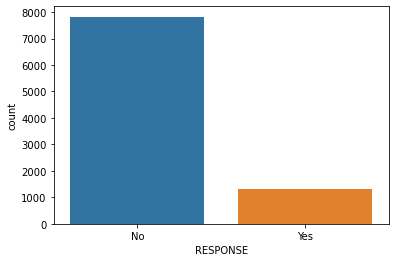

In [642]:
# total number of responses
sns.countplot(x=cust_data['RESPONSE'])
plt.show()

### Bar charts are the best for comparisons!

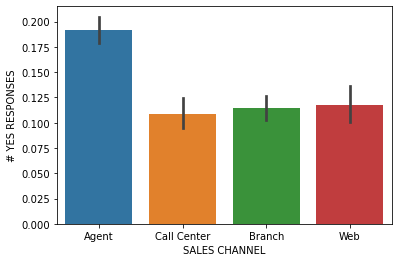

In [643]:
#response rate by total claim amount.

# response rate --> number of YES responses divided by total claim amount.

# Assign to'RESPONSE' column 1 or 0, depending if the value is Yes or No
cust_data['# YES RESPONSES'] = np.where(cust_data['RESPONSE'] == 'Yes', 1,0)

sns.barplot(x= 'SALES CHANNEL',y= '# YES RESPONSES',data=cust_data)
plt.show()

When there are too many data points, it becomes difficult to display them all in a bar chart.
The alternative is to arrange the data into a smaller number of intervals. 



In [644]:

# response rate --> number of YES responses divided by total number of responses

pd.set_option('display.max_columns', None)

# Assign to'RESPONSE' column 1 or 0, depending if the value is Yes or No
cust_data['# YES RESPONSES'] = np.where(cust_data['RESPONSE'] == 'Yes', 1,0)


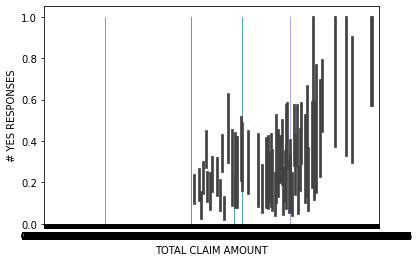

In [645]:

sns.barplot(x= 'TOTAL CLAIM AMOUNT',y= '# YES RESPONSES',data=cust_data)
plt.show()

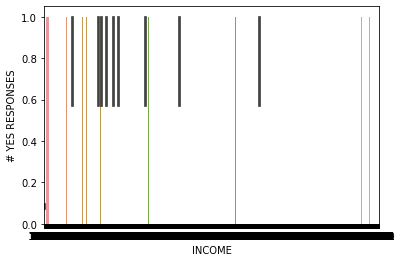

In [646]:

sns.barplot(x= 'INCOME',y= '# YES RESPONSES',data=cust_data)
plt.show()

To solve the problem of too many unique values, for the response rate by the total claim amount and or the response rate by tincome, data was grouped into 4 groups equivalent to first, second, third and fourth quartile

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: TOTAL CLAIM AMOUNT, dtype: float64
TCA_BINS
Q1    210
Q2    372
Q3    408
Q4    318
Name: # YES RESPONSES, dtype: int64


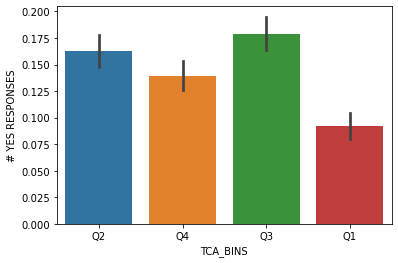

In [647]:


print(cust_data['TOTAL CLAIM AMOUNT'].describe())

def TCA_BINS_FUNCTION(x):
    if x <= np.quantile(cust_data['TOTAL CLAIM AMOUNT'], q=0.25):
        return 'Q1'
    elif x<= np.median(cust_data['TOTAL CLAIM AMOUNT']):
        return 'Q2'
    elif x<= np.quantile(cust_data['TOTAL CLAIM AMOUNT'], q=0.75):
        return 'Q3'
    else:
        return 'Q4'
    
cust_data['TCA_BINS'] = list(map(TCA_BINS_FUNCTION, cust_data['TOTAL CLAIM AMOUNT']))

print(cust_data.groupby('TCA_BINS')['# YES RESPONSES'].sum())

sns.barplot(x= 'TCA_BINS',y= '# YES RESPONSES',data=cust_data)
plt.show()

Conclusion:
 - The bar chart shows response rate by total claim amount
 - Total claim amount was split into 4 groups that represent the first, second, third and fourth quartiles
 - For 1052 customers for which response = Yes, the total claim amount is less than 548. These represents 75% of total number os customers or which response = Yes
 - Response rate is higher for total claims between 383 and 548

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: INCOME, dtype: float64
INCOME_BINS
Q1    198
Q2    468
Q3    330
Q4    312
Name: # YES RESPONSES, dtype: int64


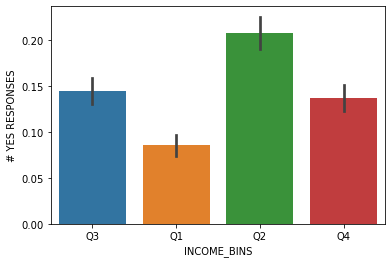

In [648]:
print(cust_data['INCOME'].describe())

def INCOME_BINS_FUNCTION(x):
    if x <= np.quantile(cust_data['INCOME'], q=0.25):
        return 'Q1'
    elif x<= np.median(cust_data['INCOME']):
        return 'Q2'
    elif x<= np.quantile(cust_data['INCOME'], q=0.75):
        return 'Q3'
    else:
        return 'Q4'
    
cust_data['INCOME_BINS'] = list(map(INCOME_BINS_FUNCTION, cust_data['INCOME']))

print(cust_data.groupby('INCOME_BINS')['# YES RESPONSES'].sum())

sns.barplot(x= 'INCOME_BINS',y= '# YES RESPONSES',data=cust_data)
plt.show()

Conclusion:
 - The bar chart shows response rate by Income
 - Income amount was split into 4 groups that represent the first, second, third and fourth quartiles
 - Majoriy of customers with response = Yes have an income between 33889 and 62320.
 - Only 198 customers with Response = Yes have an income of less than 33889

# Lab | Customer Analysis Round 4

## Complete the following task

1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)


2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution

3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [649]:
cust_data

CUSTOMER       STATE  CUSTOMER LIFETIME VALUE RESPONSE  COVERAGE  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
6      IW72280  California              5035.035257       No     Basic   
...        ...         ...                      ...      ...       ...   
10903  SU71163     Arizona              2771.663013       No     Basic   
10904  QI63521      Nevada             19228.463620       No     Basic   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   

                  EDUCATION EFFECTIVE TO DATE EMPLOYMENT STATUS GENDER  \
0                   College        2011-02-18          Employed      M   
1                   College        2011-01-18        Unemployed      F   
2                  Bachelor        2011-02-10          Employed      M   
3                   College        2011-01-11          Employed      M   
6                    Doctor        2011-02-14          Employed      F   
...                     ...               ...               ...    ...   
10903               College        2011-01-07          Employed      M   
10904  High School or Below        2011-02-24        Unemployed      M   
10906               College        2011-01-06          Employed      F   
10907              Bachelor        2011-02-06          Employed      F   
10908               College        2011-02-13          Employed      F   

       INCOME LOCATION CODE MARITAL STATUS  MONTHLY PREMIUM AUTO  \
0       48029      Suburban        Married                    61   
1           0      Suburban         Single                    64   
2       22139      Suburban         Single                   100   
3       49078      Suburban         Single                    97   
6       37405         Urban        Married                    63   
...       ...           ...            ...                   ...   
10903   59855      Suburban        Married                    74   
10904       0      Suburban         Single                   187   
10906   61146         Urban        Married                    65   
10907   39837         Rural        Married                   201   
10908   64195         Urban       Divorced                   158   

       MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
6                          8.0                             99   
...                        ...                            ...   
10903                     30.0                             82   
10904                     14.0                             32   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   

       NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES     POLICY TYPE  \
0                            0.0                   9  Corporate Auto   
1                            0.0                   1   Personal Auto   
2                            0.0                   2   Personal Auto   
3                            0.0                   2  Corporate Auto   
6                            3.0                   4  Corporate Auto   
...                          ...                 ...             ...   
10903                        4.0                   1   Personal Auto   
10904                        0.0                   2  

In [650]:
# Remove added columns from previous step
cust_data = cust_data.drop(['MONTH_EFFECTIVE TO DATE', '# YES RESPONSES','TCA_BINS','INCOME_BINS'], axis=1)

In [651]:
print('Numeric columns: ')
print(list(cust_data.select_dtypes(include = np.number))) # Numeric columns
numerical = pd.DataFrame(cust_data.select_dtypes(include = np.number))
numerical

Numeric columns: 
['CUSTOMER LIFETIME VALUE', 'INCOME', 'MONTHLY PREMIUM AUTO', 'MONTHS SINCE LAST CLAIM', 'MONTHS SINCE POLICY INCEPTION', 'NUMBER OF OPEN COMPLAINTS', 'NUMBER OF POLICIES', 'TOTAL CLAIM AMOUNT']


CUSTOMER LIFETIME VALUE  INCOME  MONTHLY PREMIUM AUTO  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
6                  5035.035257   37405                    63   
...                        ...     ...                   ...   
10903              2771.663013   59855                    74   
10904             19228.463620       0                   187   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   

       MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
6                          8.0                             99   
...                        ...                            ...   
10903                     30.0                             82   
10904                     14.0                             32   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   

       NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES  TOTAL CLAIM AMOUNT  
0                            0.0                   9          292.800000  
1                            0.0                   1          744.924331  
2                            0.0                   2          480.000000  
3                            0.0                   2          484.013411  
6                            3.0                   4          287.556107  
...                          ...                 ...                 ...  
10903                        4.0                   1          355.200000  
10904                        0.0                   2          897.600000  
10906                        0.0                   6          273.018929  
10907                        0.0                   2          381.306996  
10908                        4.0                   6          618.288849  

[9134 rows x 8 columns]

In [652]:
print('Categorical columns: ')
print(list(cust_data.select_dtypes('object'))) # Categorical columns

categorical = pd.DataFrame(cust_data.select_dtypes('object'))
categorical

Categorical columns: 
['CUSTOMER', 'STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION', 'EMPLOYMENT STATUS', 'GENDER', 'LOCATION CODE', 'MARITAL STATUS', 'POLICY TYPE', 'POLICY', 'RENEW OFFER TYPE', 'SALES CHANNEL', 'VEHICLE CLASS', 'VEHICLE SIZE', 'VEHICLE TYPE']


CUSTOMER       STATE RESPONSE  COVERAGE             EDUCATION  \
0      DK49336     Arizona       No     Basic               College   
1      KX64629  California       No     Basic               College   
2      LZ68649  Washington       No     Basic              Bachelor   
3      XL78013      Oregon      Yes  Extended               College   
6      IW72280  California       No     Basic                Doctor   
...        ...         ...      ...       ...                   ...   
10903  SU71163     Arizona       No     Basic               College   
10904  QI63521      Nevada       No     Basic  High School or Below   
10906  KX53892      Oregon       No     Basic               College   
10907  TL39050     Arizona       No  Extended              Bachelor   
10908  WA60547  California       No   Premium               College   

      EMPLOYMENT STATUS GENDER LOCATION CODE MARITAL STATUS     POLICY TYPE  \
0              Employed      M      Suburban        Married  Corporate Auto   
1            Unemployed      F      Suburban         Single   Personal Auto   
2              Employed      M      Suburban         Single   Personal Auto   
3              Employed      M      Suburban         Single  Corporate Auto   
6              Employed      F         Urban        Married  Corporate Auto   
...                 ...    ...           ...            ...             ...   
10903          Employed      M      Suburban        Married   Personal Auto   
10904        Unemployed      M      Suburban         Single   Personal Auto   
10906          Employed      F         Urban        Married   Personal Auto   
10907          Employed      F         Rural        Married  Corporate Auto   
10908          Employed      F         Urban       Divorced   Personal Auto   

             POLICY RENEW OFFER TYPE SALES CHANNEL  VEHICLE CLASS  \
0      Corporate L3           Offer3         Agent  Four-Door Car   
1       Personal L3           Offer4   Call Center  Four-Door Car   
2       Personal L3           Offer3   Call Center            SUV   
3      Corporate L3           Offer2        Branch  Four-Door Car   
6      Corporate L2           Offer2        Branch  Four-Door Car   
...             ...              ...           ...            ...   
10903   Personal L2           Offer2        Branch   Two-Door Car   
10904   Personal L2           Offer1        Branch     Luxury SUV   
10906   Personal L3           Offer2        Branch  Four-Door Car   
10907  Corporate L3           Offer1           Web     Luxury SUV   
10908   Personal L1           Offer1        Branch            SUV   

      VEHICLE SIZE VEHICLE TYPE  
0          Medsize            M  
1          Medsize            M  
2          Medsize            A  
3          Medsize            A  
6          Medsize            M  
...            ...          ...  
10903      Medsize            A  
10904      Medsize            A  
10906      Medsize            A  
10907      Medsize            M  
10908      Medsize            A  

[9134 rows x 16 columns]

One of the techniques for checking whether a sample of data follows a normal distribution is the graphical method.

A simple and commonly used plot to quickly check the distribution of a sample of data is the histogram.

A sample of data has a normal distribution when th histogram shows the familiar bell shape.

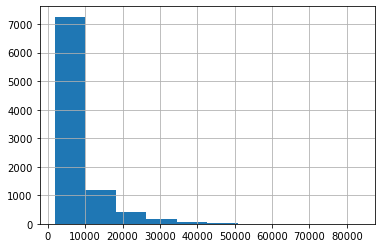

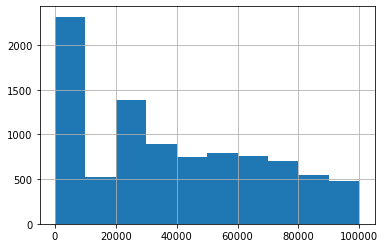

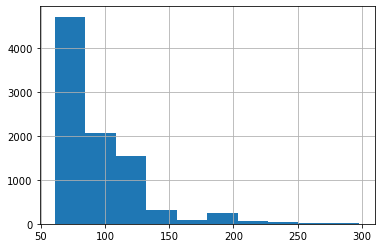

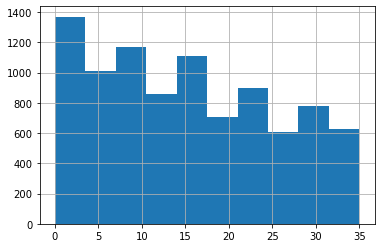

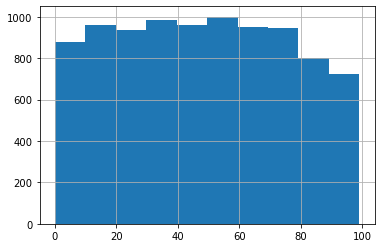

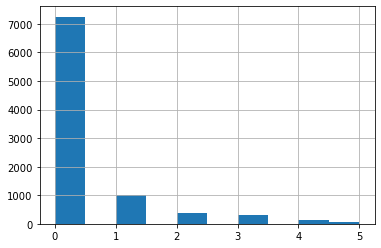

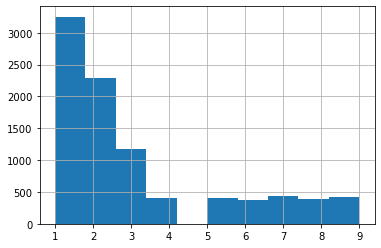

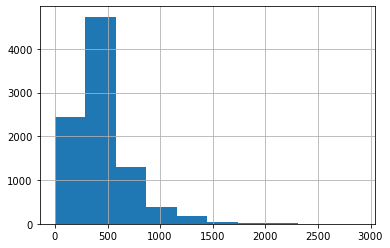

In [653]:
for i in range(len(numerical.columns)):
    numerical.iloc[:,i].hist()
    plt.show()

By simply looking at this histograms above, it is possible to tell that none of variables have a “bell-shape” and is not normally distributed.

Another way to chek the normality os the numerical variables is to calculate skewness.
 - Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
 The skewness value can be positive, zero or negative

In general:
 - The variables with skewness > 1 are highly positively skewed.
 - The variables with skewness < -1 are highly negatively skewed.
 - The variables with 0.5 < skewness < 1 such are moderately positively skewed.
 - The variables with -0.5 < skewness < -1 are moderately negatively skewed.
 - the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed


In [654]:
numerical.skew()

CUSTOMER LIFETIME VALUE          3.032280
INCOME                           0.286887
MONTHLY PREMIUM AUTO             2.123546
MONTHS SINCE LAST CLAIM          0.278586
MONTHS SINCE POLICY INCEPTION    0.040165
NUMBER OF OPEN COMPLAINTS        2.783263
NUMBER OF POLICIES               1.253333
TOTAL CLAIM AMOUNT               1.714966
dtype: float64

In [655]:
The distributions that need to look like a normal distribution are:
    CUSTOMER LIFETIME VALUE
    MONTHLY PREMIUM AUTO
    NUMBER OF OPEN COMPLAINTS
    NUMBER OF POLICIES
    


SyntaxError: invalid syntax (810817062.py, line 1)

In [ ]:

#original histogram for CUSTOMER LIFETIME VALUE

sns.displot(numerical['CUSTOMER LIFETIME VALUE'])
plt.show()

In [ ]:
#Fit CUSTOMER LIFETIME VALUE data into normal distribution using BOXCOX

import scipy.stats as stats

#transform training data & save lambda value
CLV_boxcox, fitted_lambda = stats.boxcox(numerical['CUSTOMER LIFETIME VALUE'])

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(numerical['CUSTOMER LIFETIME VALUE'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(CLV_boxcox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
numerical['CLV_BOXCOX'] = CLV_boxcox

# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")
 

In [ ]:
numerical['CLV_BOXCOX'].hist()
plt.show()

print(numerical['CLV_BOXCOX'].skew())

In [ ]:
# Fit MONTHLY PREMIUM AUTO data into normal distribution

#transform training data & save lambda value
M_Premium_Auto_boxcox, fitted_lambda2 = stats.boxcox(numerical['MONTHLY PREMIUM AUTO'])

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(numerical['MONTHLY PREMIUM AUTO'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(M_Premium_Auto_boxcox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
numerical['M_Premium_Auto_boxcox'] = M_Premium_Auto_boxcox

# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda2}")
 

In [ ]:
numerical['M_Premium_Auto_boxcox'].hist()
plt.show()

print(numerical['M_Premium_Auto_boxcox'].skew())

In [ ]:
# Fit NUMBER OF POLICIES data into normal distribution

#transform training data & save lambda value
NUMBER_OF_POLICIES_boxcox, fitted_lambda3 = stats.boxcox(numerical['NUMBER OF POLICIES'])

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(numerical['NUMBER OF POLICIES'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(NUMBER_OF_POLICIES_boxcox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
numerical['NUMBER_OF_POLICIES_boxcox'] = NUMBER_OF_POLICIES_boxcox

# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda3}")
 

In [ ]:
numerical['NUMBER_OF_POLICIES_boxcox'].hist()
plt.show()

print(numerical['NUMBER_OF_POLICIES_boxcox'].skew())

In [ ]:
# Fit NUMBER OF OPEN COMPLAINTS data into normal distribution


#transform training data & save lambda value

numerical['OPEN_COMPLAINTS_'] = np.where(numerical['NUMBER OF OPEN COMPLAINTS']<=0,0,numerical['NUMBER OF OPEN COMPLAINTS'])
mean = np.sum(numerical['OPEN_COMPLAINTS_'] )/len(numerical[numerical['OPEN_COMPLAINTS_'] >0])
numerical['OPEN_COMPLAINTS_'] = numerical['OPEN_COMPLAINTS_'].replace(0,mean)

OPEN_COMPLAINTS_boxcox, fitted_lambda4 = stats.boxcox(numerical['OPEN_COMPLAINTS_'])

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(numerical['OPEN_COMPLAINTS_'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(OPEN_COMPLAINTS_boxcox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
numerical['OPEN_COMPLAINTS_boxcox'] = OPEN_COMPLAINTS_boxcox

# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda4}")
 

In [ ]:
numerical['OPEN_COMPLAINTS_boxcox'].hist()
plt.show()

print(numerical['OPEN_COMPLAINTS_boxcox'].skew())

Even though, not all distributions of data above visually look like normal distributions, the skewness is between -0.5 and 0.5 therefore the distributions are approximately symmetric.


In [ ]:
# First we need to remove old columns

numerical2 = numerical.drop(['CUSTOMER LIFETIME VALUE', 'MONTHLY PREMIUM AUTO','NUMBER OF OPEN COMPLAINTS','NUMBER OF POLICIES','CLV_boxcox','OPEN_COMPLAINTS_'], axis=1)

In [ ]:
numerical2.skew()

TOTAL CLAIM AMOUNT is the target (dependent variable), so there is not need to How to transform the values to better bit the normal distribution

Multicollinearity describes the state where the independent variables used in a study exhibit a strong relationship with each other.

This can pose a problem in many cases as you would normally want your independent variables to be… independent.

Depending on the aim and scope of your projects, it may be worthwhile to identify and address any signs of multicollinearity.

Detecting Multicollinearity:
 1. Correlation Coefficient
 2. Variance Inflation Factor (VIF)

In [ ]:
# Computing the correlation coefficient

sns.heatmap(numerical2.corr(),annot=True)
plt.title('Correlation coefficient')
plt.show()

From the heatmap there is no strong correlations between features. However we can see some correlarion between:
 - Monthly Premium Auto and Customer Lifetime Value
 - Number of policies and Customer Lifetime Value

In [ ]:
# Computing the VIF

# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = numerical2[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

# features to consider removing
considered_features = ['INCOME', 'MONTHS SINCE LAST CLAIM', 'MONTHS SINCE POLICY INCEPTION',
                       'CLV_BOXCOX', 'M_Premium_Auto_boxcox',
       'NUMBER_OF_POLICIES_boxcox', 'OPEN_COMPLAINTS_boxcox']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

A VIF greater or equal to 5 will be deemed to be too large.

As shown in the table above, the variance inflation factors are all within the acceptable range

There are no features with Correlation coefficient greater than 0.9. Decision is to keep all variables for predictive analysis

# Lab | Customer Analysis Round 5

Processing Data

1. X-y split.
2. Normalize (numerical).

In [ ]:
cust_data

In [574]:
cust_data = pd.concat([numerical, categorical], axis=1)
cust_data = cust_data.drop(['CLV_BOXCOX','M_Premium_Auto_boxcox','NUMBER_OF_POLICIES_boxcox','CLV_boxcox','OPEN_COMPLAINTS_','OPEN_COMPLAINTS_boxcox'], axis=1)
cust_data.shape

# define variables
y = cust_data['TOTAL CLAIM AMOUNT']
X = cust_data.drop(['TOTAL CLAIM AMOUNT'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(object)

In [575]:
# one hot-encode all categorical features

In [576]:
# Using MinMaxScaler to scale the data without changing the shape of the distribution

from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)
x_normalized

(9134, 7)


CUSTOMER LIFETIME VALUE    INCOME  MONTHLY PREMIUM AUTO  \
0                    0.035752  0.480381              0.000000   
1                    0.004059  0.000000              0.012658   
2                    0.160264  0.221432              0.164557   
3                    0.250953  0.490873              0.151899   
4                    0.038525  0.374121              0.008439   
...                       ...       ...                   ...   
9129                 0.010729  0.598664              0.054852   
9130                 0.212833  0.000000              0.531646   
9131                 0.041281  0.611576              0.016878   
9132                 0.270122  0.398446              0.590717   
9133                 0.123717  0.642072              0.409283   

      MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                    0.200000                       0.525253   
1                    0.085714                       0.262626   
2                    0.971429                       0.313131   
3                    0.285714                       0.030303   
4                    0.228571                       1.000000   
...                       ...                            ...   
9129                 0.857143                       0.828283   
9130                 0.400000                       0.323232   
9131                 0.200000                       0.686869   
9132                 0.314286                       0.636364   
9133                 0.000000                       0.272727   

      NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES  
0                           0.0               1.000  
1                           0.0               0.000  
2                           0.0               0.125  
3                           0.0               0.125  
4                           0.6               0.375  
...                         ...                 ...  
9129                        0.8               0.000  
9130                        0.0               0.125  
9131                        0.0               0.625  
9132                        0.0               0.125  
9133                        0.8               0.625  

[9134 rows x 7 columns]

All features above are on the same relative scale. The relative spaces between each feature’s values have been maintained.


# Lab | Customer Analysis Round 6

Processing Data


3. One Hot/Label Encoding (categorical).
4. Concat DataFrames
5. Linear Regression

Train-test split.
1. Apply linear regression.
2. Model Validation

Description:
1. R2.
2. MSE.
3. RMSE.
4. MAE.

In [577]:
# one hot-encode all categorical feature

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_cat)
encoded_for_p = encoder.transform(X_cat).toarray()
encoded_for_p
cols = encoder.get_feature_names(input_features=X_cat.columns)
cols


onehot_encoded_for_p = pd.DataFrame(encoded_for_p, columns=cols)
onehot_encoded_for_p.head()

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


CUSTOMER_AA11235  CUSTOMER_AA16582  CUSTOMER_AA30683  CUSTOMER_AA34092  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AA35519  CUSTOMER_AA56476  CUSTOMER_AA69265  CUSTOMER_AA71604  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AA93585  CUSTOMER_AB13432  CUSTOMER_AB21519  CUSTOMER_AB23825  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AB26022  CUSTOMER_AB31813  CUSTOMER_AB45325  CUSTOMER_AB60627  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AB62982  CUSTOMER_AB69140  CUSTOMER_AB72731  CUSTOMER_AB73565  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AB78984  CUSTOMER_AB96670  CUSTOMER_AB98823  CUSTOMER_AC13887  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AC22873  CUSTOMER_AC24378  CUSTOMER_AC40767  CUSTOMER_AC42963  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AC58002  CUSTOMER_AC67315  CUSTOMER_AC73173  CUSTOMER_AC75391  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AC79024  CUSTOMER_AD12500  CUSTOMER_AD18174  CUSTOMER_AD28349  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0             

In [578]:
# new dataframe
df = pd.concat([x_normalized, onehot_encoded_for_p], axis=1)
df

CUSTOMER LIFETIME VALUE    INCOME  MONTHLY PREMIUM AUTO  \
0                    0.035752  0.480381              0.000000   
1                    0.004059  0.000000              0.012658   
2                    0.160264  0.221432              0.164557   
3                    0.250953  0.490873              0.151899   
4                    0.038525  0.374121              0.008439   
...                       ...       ...                   ...   
9129                 0.010729  0.598664              0.054852   
9130                 0.212833  0.000000              0.531646   
9131                 0.041281  0.611576              0.016878   
9132                 0.270122  0.398446              0.590717   
9133                 0.123717  0.642072              0.409283   

      MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                    0.200000                       0.525253   
1                    0.085714                       0.262626   
2                    0.971429                       0.313131   
3                    0.285714                       0.030303   
4                    0.228571                       1.000000   
...                       ...                            ...   
9129                 0.857143                       0.828283   
9130                 0.400000                       0.323232   
9131                 0.200000                       0.686869   
9132                 0.314286                       0.636364   
9133                 0.000000                       0.272727   

      NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES  CUSTOMER_AA11235  \
0                           0.0               1.000               0.0   
1                           0.0               0.000               0.0   
2                           0.0               0.125               0.0   
3                           0.0               0.125               0.0   
4                           0.6               0.375               0.0   
...                         ...                 ...               ...   
9129                        0.8               0.000               0.0   
9130                        0.0               0.125               0.0   
9131                        0.0               0.625               0.0   
9132                        0.0               0.125               0.0   
9133                        0.8               0.625               0.0   

      CUSTOMER_AA16582  CUSTOMER_AA30683  CUSTOMER_AA34092  CUSTOMER_AA35519  \
0                  0.0               0.0               0.0               0.0   
1                  0.0               0.0               0.0               0.0   
2                  0.0               0.0               0.0               0.0   
3                  0.0               0.0               0.0               0.0   
4                  0.0               0.0               0.0               0.0   
...                ...               ...               ...               ...   
9129               0.0               0.0               0.0               0.0   
9130               0.0               0.0               0.0               0.0   
9131               0.0               0.0               0.0               0.0   
9132               0.0               0.0               0.0               0.0   
9133               0.0               0.0               0.0               0.0   

      CUSTOMER_AA56476  CUSTOMER_AA69265  CUSTOMER_AA71604  CUSTOMER_AA93585  \
0                  0.0               0.0               0.0               0.0   
1                  0.0               0.0               0.0               0.0   
2                  0.0               0.0               0.0               0.0   
3                  0.0               0.0               0.0               0.0   
4                  0.0               0.0               0.0               0.0   
...                ...               ...               ...               ...   
9129               0.0               0.0               0.0

In [579]:
#train test split 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)



In [580]:
# making predictions

from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [581]:
predictions_test = lm.predict(X_test)

In [582]:
from sklearn.metrics import mean_absolute_error, r2_score

Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model.

It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s).

It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

In [583]:
r2 = r2_score(y_test, predictions_test)
r2

0.6815151115937657

In this case 68% of the changes to the Total Claim Amount can be explained by the model while the remaining 32 % of the variability is still unaccounted for.

The higher the r2, the better are the results.

The Mean Squared Error (MSE) measures the average of error squares i.e. the average squared difference between the estimated values and true value.

In [584]:
from sklearn.metrics import mean_squared_error
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions_test)
mse

27841.192258578158

RMSE: Root Mean Square Error is the measure of how well a regression line fits the data points. RMSE can also be construed as Standard Deviation in the residuals.

In [585]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

166.8568016551263

Mean Absolute Error calculates the average difference between the calculated values and actual values.
It calculates errors between actual values and values predicted by the model. It is used to predict the accuracy of the model.

In [586]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

124.22059083966317


# Lab | Customer Analysis Round 7

Modeling

1. Description: Try to improve the linear regression model.

In [587]:
# create a new dataset with feature removal 

In [588]:
cust_data

CUSTOMER LIFETIME VALUE  INCOME  MONTHLY PREMIUM AUTO  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
6                  5035.035257   37405                    63   
...                        ...     ...                   ...   
10903              2771.663013   59855                    74   
10904             19228.463620       0                   187   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   

       MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
6                          8.0                             99   
...                        ...                            ...   
10903                     30.0                             82   
10904                     14.0                             32   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   

       NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES  TOTAL CLAIM AMOUNT  \
0                            0.0                   9          292.800000   
1                            0.0                   1          744.924331   
2                            0.0                   2          480.000000   
3                            0.0                   2          484.013411   
6                            3.0                   4          287.556107   
...                          ...                 ...                 ...   
10903                        4.0                   1          355.200000   
10904                        0.0                   2          897.600000   
10906                        0.0                   6          273.018929   
10907                        0.0                   2          381.306996   
10908                        4.0                   6          618.288849   

      CUSTOMER       STATE RESPONSE  COVERAGE             EDUCATION  \
0      DK49336     Arizona       No     Basic               College   
1      KX64629  California       No     Basic               College   
2      LZ68649  Washington       No     Basic              Bachelor   
3      XL78013      Oregon      Yes  Extended               College   
6      IW72280  California       No     Basic                Doctor   
...        ...         ...      ...       ...                   ...   
10903  SU71163     Arizona       No     Basic               College   
10904  QI63521      Nevada       No     Basic  High School or Below   
10906  KX53892      Oregon       No     Basic               College   
10907  TL39050     Arizona       No  Extended              Bachelor   
10908  WA60547  California       No   Premium               College   

      EMPLOYMENT STATUS GENDER LOCATION CODE MARITAL STATUS     POLICY TYPE  \
0              Employed      M      Suburban        Married  Corporate Auto   
1            Unemployed      F      Suburban         Single   Personal Auto   
2              Employed      M      Suburban         Single   Personal Auto   
3              Employed      M      Suburban         Single  Corporate Auto   
6              Employed      F         Urban        Married  Corporate Auto   
...                 ...    ...           ...            ...             ...   
10903          Employed      M      Suburban        Married   Personal Auto   
10904        Unemployed      M      Suburban         Single

In [589]:
cust_data_fs = cust_data.drop(['CUSTOMER', 'CUSTOMER LIFETIME VALUE'], axis = 1)
cust_data_fs

INCOME  MONTHLY PREMIUM AUTO  MONTHS SINCE LAST CLAIM  \
0       48029                    61                      7.0   
1           0                    64                      3.0   
2       22139                   100                     34.0   
3       49078                    97                     10.0   
6       37405                    63                      8.0   
...       ...                   ...                      ...   
10903   59855                    74                     30.0   
10904       0                   187                     14.0   
10906   61146                    65                      7.0   
10907   39837                   201                     11.0   
10908   64195                   158                      0.0   

       MONTHS SINCE POLICY INCEPTION  NUMBER OF OPEN COMPLAINTS  \
0                                 52                        0.0   
1                                 26                        0.0   
2                                 31                        0.0   
3                                  3                        0.0   
6                                 99                        3.0   
...                              ...                        ...   
10903                             82                        4.0   
10904                             32                        0.0   
10906                             68                        0.0   
10907                             63                        0.0   
10908                             27                        4.0   

       NUMBER OF POLICIES  TOTAL CLAIM AMOUNT       STATE RESPONSE  COVERAGE  \
0                       9          292.800000     Arizona       No     Basic   
1                       1          744.924331  California       No     Basic   
2                       2          480.000000  Washington       No     Basic   
3                       2          484.013411      Oregon      Yes  Extended   
6                       4          287.556107  California       No     Basic   
...                   ...                 ...         ...      ...       ...   
10903                   1          355.200000     Arizona       No     Basic   
10904                   2          897.600000      Nevada       No     Basic   
10906                   6          273.018929      Oregon       No     Basic   
10907                   2          381.306996     Arizona       No  Extended   
10908                   6          618.288849  California       No   Premium   

                  EDUCATION EMPLOYMENT STATUS GENDER LOCATION CODE  \
0                   College          Employed      M      Suburban   
1                   College        Unemployed      F      Suburban   
2                  Bachelor          Employed      M      Suburban   
3                   College          Employed      M      Suburban   
6                    Doctor          Employed      F         Urban   
...                     ...               ...    ...           ...   
10903               College          Employed      M      Suburban   
10904  High School or Below        Unemployed      M      Suburban   
10906               College          Employed      F         Urban   
10907              Bachelor          Employed      F         Rural   
10908               College          Employed      F         Urban   

      MARITAL STATUS     POLICY TYPE        POLICY RENEW OFFER TYPE  \
0            Married  Corporate Auto  Corporate L3           Offer3   
1             Single   Personal Auto   Personal L3           Offer4   
2             Single   Personal Auto   Personal L3           Offer3   
3             Single  Corporate Auto  Corporate L3           Offer2   
6            Married  Corporate Auto  Corporate L2           Offer2   
...              ...             ...           ...              ...   
10903        Married   Personal Auto   Personal L2           Offer2   
10904         Single   Personal Auto   Personal L2           Of

Columns to drop:
 - CUSTOMER: values are unique
 - CUSTOMER LIFETIME VALUE: higher VIF

In [590]:
y_fs = cust_data_fs['TOTAL CLAIM AMOUNT']
X_fs = cust_data_fs.drop(['TOTAL CLAIM AMOUNT'], axis=1)
X_num_fs = X_fs.select_dtypes(include = np.number)
X_cat_fs = X_fs.select_dtypes(object)

In [591]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_num_fs)
x_normalized_fs = transformer.transform(X_num_fs)
print(x_normalized.shape)
x_normalized_fs = pd.DataFrame(x_normalized_fs, columns=X_num_fs.columns)
x_normalized_fs

(9134, 7)


INCOME  MONTHLY PREMIUM AUTO  MONTHS SINCE LAST CLAIM  \
0     0.480381              0.000000                 0.200000   
1     0.000000              0.012658                 0.085714   
2     0.221432              0.164557                 0.971429   
3     0.490873              0.151899                 0.285714   
4     0.374121              0.008439                 0.228571   
...        ...                   ...                      ...   
9129  0.598664              0.054852                 0.857143   
9130  0.000000              0.531646                 0.400000   
9131  0.611576              0.016878                 0.200000   
9132  0.398446              0.590717                 0.314286   
9133  0.642072              0.409283                 0.000000   

      MONTHS SINCE POLICY INCEPTION  NUMBER OF OPEN COMPLAINTS  \
0                          0.525253                        0.0   
1                          0.262626                        0.0   
2                          0.313131                        0.0   
3                          0.030303                        0.0   
4                          1.000000                        0.6   
...                             ...                        ...   
9129                       0.828283                        0.8   
9130                       0.323232                        0.0   
9131                       0.686869                        0.0   
9132                       0.636364                        0.0   
9133                       0.272727                        0.8   

      NUMBER OF POLICIES  
0                  1.000  
1                  0.000  
2                  0.125  
3                  0.125  
4                  0.375  
...                  ...  
9129               0.000  
9130               0.125  
9131               0.625  
9132               0.125  
9133               0.625  

[9134 rows x 6 columns]

In [594]:
# one hot-encode all categorical feature

from sklearn.preprocessing import OneHotEncoder

encoder_fs = OneHotEncoder(drop='first').fit(X_cat_fs)
encoded_for_p_fs = encoder_fs.transform(X_cat_fs).toarray()
encoded_for_p_fs
cols = encoder_fs.get_feature_names(input_features=X_cat_fs.columns)
cols


onehot_encoded_for_p_fs = pd.DataFrame(encoded_for_p_fs, columns=cols)
onehot_encoded_for_p_fs.head()

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


STATE_California  STATE_Nevada  STATE_Oregon  STATE_Washington  \
0               0.0           0.0           0.0               0.0   
1               1.0           0.0           0.0               0.0   
2               0.0           0.0           0.0               1.0   
3               0.0           0.0           1.0               0.0   
4               1.0           0.0           0.0               0.0   

   RESPONSE_Yes  COVERAGE_Extended  COVERAGE_Premium  EDUCATION_College  \
0           0.0                0.0               0.0                1.0   
1           0.0                0.0               0.0                1.0   
2           0.0                0.0               0.0                0.0   
3           1.0                1.0               0.0                1.0   
4           0.0                0.0               0.0                0.0   

   EDUCATION_Doctor  EDUCATION_High School or Below  EDUCATION_Master  \
0               0.0                             0.0               0.0   
1               0.0                             0.0               0.0   
2               0.0                             0.0               0.0   
3               0.0                             0.0               0.0   
4               1.0                             0.0               0.0   

   EMPLOYMENT STATUS_Employed  EMPLOYMENT STATUS_Medical Leave  \
0                         1.0                              0.0   
1                         0.0                              0.0   
2                         1.0                              0.0   
3                         1.0                              0.0   
4                         1.0                              0.0   

   EMPLOYMENT STATUS_Retired  EMPLOYMENT STATUS_Unemployed  GENDER_M  \
0                        0.0                           0.0       1.0   
1                        0.0                           1.0       0.0   
2                        0.0                           0.0       1.0   
3                        0.0                           0.0       1.0   
4                        0.0                           0.0       0.0   

   LOCATION CODE_Suburban  LOCATION CODE_Urban  MARITAL STATUS_Married  \
0                     1.0                  0.0                     1.0   
1                     1.0                  0.0                     0.0   
2                     1.0                  0.0                     0.0   
3                     1.0                  0.0                     0.0   
4                     0.0                  1.0                     1.0   

   MARITAL STATUS_Single  POLICY TYPE_Personal Auto  POLICY TYPE_Special Auto  \
0                    0.0                        0.0                       0.0   
1                    1.0                        1.0                       0.0   
2                    1.0                        1.0                       0.0   
3                    1.0                        0.0                       0.0   
4                    0.0                        0.0                       0.0   

   POLICY_Corporate L2  POLICY_Corporate L3  POLICY_Personal L1  \
0                  0.0                  1.0                 0.0   
1                  0.0                  0.0                 0.0   
2                  0.0                  0.0                 0.0   
3                  0.0                  1.0                 0.0   
4                  1.0                  0.0                 0.0   

   POLICY_Personal L2  POLICY_Personal L3  POLICY_Special L1  \
0                 0.0                 0.0                0.0   
1                 0.0                 1.0                0.0   
2                 0.0                 1.0                0.0   
3                 0.0                 0.0                0.0   
4                 0.0                 0.0                0.0   

   POLICY_Special L2  POLICY_Special L3  RENEW OFFER TYPE_Offer2  \
0                0.0                0.0                      0.0   
1           

In [595]:
# new dataframe
df_fs = pd.concat([x_normalized_fs, onehot_encoded_for_p_fs], axis=1)
df_fs

INCOME  MONTHLY PREMIUM AUTO  MONTHS SINCE LAST CLAIM  \
0     0.480381              0.000000                 0.200000   
1     0.000000              0.012658                 0.085714   
2     0.221432              0.164557                 0.971429   
3     0.490873              0.151899                 0.285714   
4     0.374121              0.008439                 0.228571   
...        ...                   ...                      ...   
9129  0.598664              0.054852                 0.857143   
9130  0.000000              0.531646                 0.400000   
9131  0.611576              0.016878                 0.200000   
9132  0.398446              0.590717                 0.314286   
9133  0.642072              0.409283                 0.000000   

      MONTHS SINCE POLICY INCEPTION  NUMBER OF OPEN COMPLAINTS  \
0                          0.525253                        0.0   
1                          0.262626                        0.0   
2                          0.313131                        0.0   
3                          0.030303                        0.0   
4                          1.000000                        0.6   
...                             ...                        ...   
9129                       0.828283                        0.8   
9130                       0.323232                        0.0   
9131                       0.686869                        0.0   
9132                       0.636364                        0.0   
9133                       0.272727                        0.8   

      NUMBER OF POLICIES  STATE_California  STATE_Nevada  STATE_Oregon  \
0                  1.000               0.0           0.0           0.0   
1                  0.000               1.0           0.0           0.0   
2                  0.125               0.0           0.0           0.0   
3                  0.125               0.0           0.0           1.0   
4                  0.375               1.0           0.0           0.0   
...                  ...               ...           ...           ...   
9129               0.000               0.0           0.0           0.0   
9130               0.125               0.0           1.0           0.0   
9131               0.625               0.0           0.0           1.0   
9132               0.125               0.0           0.0           0.0   
9133               0.625               1.0           0.0           0.0   

      STATE_Washington  RESPONSE_Yes  COVERAGE_Extended  COVERAGE_Premium  \
0                  0.0           0.0                0.0               0.0   
1                  0.0           0.0                0.0               0.0   
2                  1.0           0.0                0.0               0.0   
3                  0.0           1.0                1.0               0.0   
4                  0.0           0.0                0.0               0.0   
...                ...           ...                ...               ...   
9129               0.0           0.0                0.0               0.0   
9130               0.0           0.0                0.0               0.0   
9131               0.0           0.0                0.0               0.0   
9132               0.0           0.0                1.0               0.0   
9133               0.0           0.0                0.0               1.0   

      EDUCATION_College  EDUCATION_Doctor  EDUCATION_High School or Below  \
0                   1.0               0.0                             0.0   
1                   1.0               0.0                             0.0   
2                   0.0               0.0                             0.0   
3                   1.0               0.0                             0.0   
4                   0.0               1.0                             0.0   
...                 ...               ...                             ...   
9129                1.0               0.0                             0.0   
9130

In [596]:
#train test split 

from sklearn.model_selection import train_test_split
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(df_fs, y_fs, test_size=0.2, random_state=42)




In [597]:
# making predictions

from sklearn import linear_model

lm_fs = linear_model.LinearRegression()
lm_fs.fit(X_train_fs,y_train_fs)

LinearRegression()

In [598]:
predictions_test_fs = lm_fs.predict(X_test_fs)

In [599]:
mse_fs=mean_squared_error(y_test_fs,predictions_test_fs)
mse_fs

19825.33496856416

In [600]:
print('Mean squared error without feature selection: {}'.format(np.round(mse,2)))
print('Mean squared error with feature selection: {}'.format(np.round(mse_fs,2)))

Mean squared error without feature selection: 27841.19
Mean squared error with feature selection: 19825.33


As shown in the output, the mean squared error values improved when CUSTOMER ID and CUSTOMER LIFETIME VALUE were left out, showing that there is a considerable impact when variables highly correlated are removed.

The first scenario shows a greayer mse, meaning that the data values are more dispersed widely around its central moment (mean), compared to the second scenario.
A smaller mse is definitely the desired choice as it shows that the data values are dispersed closely to its central moment (mean).

# Lab | Customer Analysis Final Round

The objective of this data is to understand customer demographics and buying behavior.

1. Who are the most profitable customers and how they interact

2. What actions to be taken to increase profitable customer response, retention, and growth?


In [607]:
cust_data.shape

(9134, 24)

In [606]:
print(cust_data.groupby(['STATE'])['CUSTOMER'].aggregate('count').reset_index().sort_values('CUSTOMER', ascending=False))

print("Total number of customers: ",cust_data['CUSTOMER'].count())

        STATE  CUSTOMER
1  California      3150
3      Oregon      2601
0     Arizona      1703
2      Nevada       882
4  Washington       798
Total number of customers:  9134


More than 80% of the customers in the data are from California, Oregon and Arizona, so the analysis will be restricted to the data from these States only.



In [611]:

cust_data_restricted = cust_data[cust_data['STATE'].isin(['California','Oregon','Arizona'])]
cust_data_restricted

CUSTOMER LIFETIME VALUE  INCOME  MONTHLY PREMIUM AUTO  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
3                 22332.439460   49078                    97   
6                  5035.035257   37405                    63   
7                  4956.247235   87197                    63   
...                        ...     ...                   ...   
10902              3579.023825   28304                    91   
10903              2771.663013   59855                    74   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   

       MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                          7.0                             52   
1                          3.0                             26   
3                         10.0                              3   
6                          8.0                             99   
7                         35.0                             45   
...                        ...                            ...   
10902                     10.0                             30   
10903                     30.0                             82   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   

       NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES  TOTAL CLAIM AMOUNT  \
0                            0.0                   9          292.800000   
1                            0.0                   1          744.924331   
3                            0.0                   2          484.013411   
6                            3.0                   4          287.556107   
7                            0.0                   3          247.402353   
...                          ...                 ...                 ...   
10902                        2.0                   1          655.200000   
10903                        4.0                   1          355.200000   
10906                        0.0                   6          273.018929   
10907                        0.0                   2          381.306996   
10908                        4.0                   6          618.288849   

      CUSTOMER       STATE RESPONSE  COVERAGE             EDUCATION  \
0      DK49336     Arizona       No     Basic               College   
1      KX64629  California       No     Basic               College   
3      XL78013      Oregon      Yes  Extended               College   
6      IW72280  California       No     Basic                Doctor   
7      IH64929  California       No     Basic  High School or Below   
...        ...         ...      ...       ...                   ...   
10902  PP30874  California       No  Extended  High School or Below   
10903  SU71163     Arizona       No     Basic               College   
10906  KX53892      Oregon       No     Basic               College   
10907  TL39050     Arizona       No  Extended              Bachelor   
10908  WA60547  California       No   Premium               College   

      EMPLOYMENT STATUS GENDER LOCATION CODE MARITAL STATUS     POLICY TYPE  \
0              Employed      M      Suburban        Married  Corporate Auto   
1            Unemployed      F      Suburban         Single   Personal Auto   
3              Employed      M      Suburban         Single  Corporate Auto   
6              Employed      F         Urban        Married  Corporate Auto   
7              Employed      M         Urban         Single   Personal Auto   
...                 ...    ...           ...            ...             ...   
10902          Employed      F      Suburban        Married   Personal Auto   
10903          Employed      M      Suburban        Married

In [ ]:
#Create a RFM table
rfmTable = cust_data_restricted.groupby('CUSTOMER').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TOTAL CLAIM AMOUNT': 'monetary_value'}, inplace=True)